In [7]:
import pandas as pd

### EDA

In [8]:
data = pd.read_csv('part 1 ETL Workflow/working.csv')


In [9]:
data.describe()

,RetailPrice,Unnamed: 0,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,g_sum,other_carbs,...,boxcox_energy_100g,transformed_energy_100g,boxcox_reconstructed_energy,transformed_reconstructed_energy,boxcox_g_sum,transformed_g_sum,cluster,certainty,alternative_cluster,anomaly
count,120.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,...,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,7.008865,143047.950820,1103.200000,12.296311,33.479180,18.030410,5.056885,0.930325,51.770492,15.448770,...,0.623218,-0.025041,0.629356,-0.019116,2.045422,-0.017079,11.344262,0.981486,8.442623,0.090164
std,5.963671,105788.601744,841.660626,20.208027,31.559028,22.327418,6.878677,1.661041,34.582943,21.047092,...,0.963041,1.099711,0.958650,1.088676,2.062497,1.040656,6.146652,0.078095,5.336680,0.287598
min,0.382000,207.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.813555,-1.665713,-0.813555,-1.657737,-0.780754,-1.443058,0.000000,0.527500,1.000000,0.000000
25%,2.391075,59874.500000,226.250000,0.000000,6.670000,1.925000,0.000000,0.014985,14.000000,0.525000,...,-0.422789,-1.219492,-0.397600,-1.185364,-0.195765,-1.147896,6.000000,0.999525,6.000000,0.000000
50%,6.023761,121061.000000,1197.000000,1.800000,16.470000,9.000000,2.350000,0.194310,53.000000,4.880000,...,0.824772,0.205116,0.806664,0.182241,1.972328,-0.053959,12.000000,1.000000,6.000000,0.000000
75%,9.552561,190854.000000,1578.750000,17.925000,62.725000,29.307500,6.767500,1.235355,87.500000,22.897500,...,1.233727,0.672108,1.285960,0.726546,4.199068,1.069568,16.750000,1.000000,12.000000,0.000000
max,37.341726,354786.000000,3404.000000,93.300000,92.860000,89.290000,26.900000,11.430000,98.000000,77.790000,...,2.916923,2.594174,2.950581,2.616948,4.915540,1.431072,19.000000,1.000000,19.000000,1.000000


<Axes: >

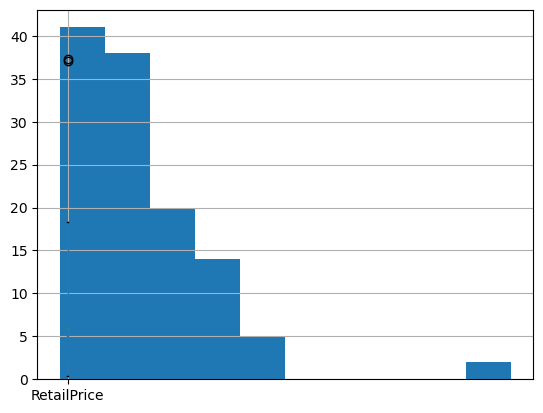

In [10]:
data['RetailPrice'].hist()
data.boxplot(column=['RetailPrice'])

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), annot=True)
plt.show()

ValueError: could not convert string to float: 'Artichoke'

<Axes: xlabel='RetailPrice', ylabel='g_sum'>

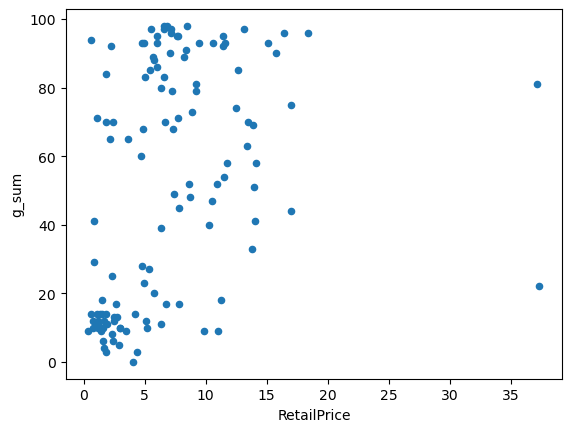

In [7]:
data.plot.scatter(x='RetailPrice', y='g_sum')

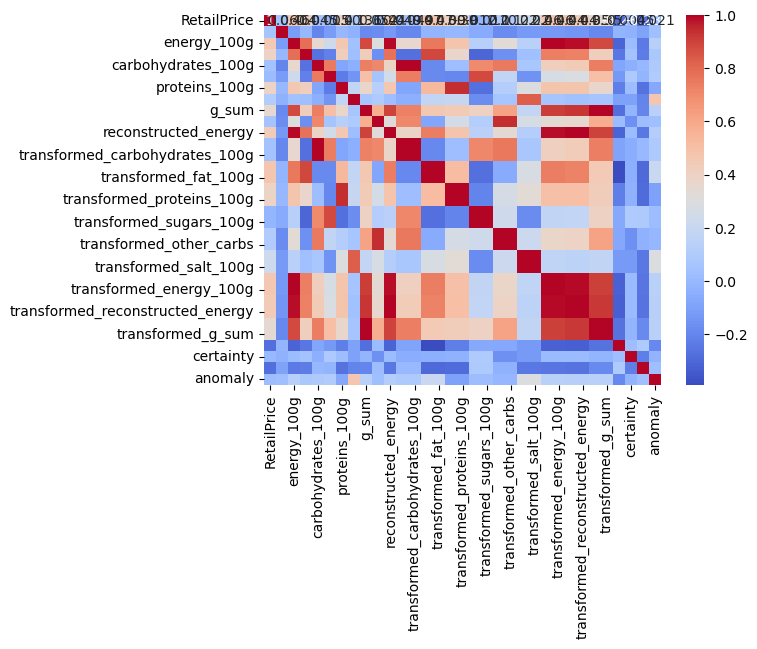

In [10]:
# Filter out non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Create the heatmap with the numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

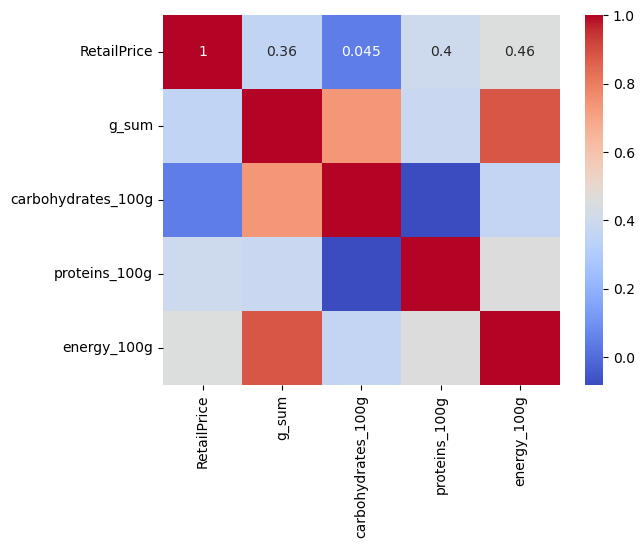

In [13]:
# Select specific columns for the heatmap
columns_of_interest = ['RetailPrice', 'g_sum', 'carbohydrates_100g', 'proteins_100g', 'energy_100g']  # Replace with your actual column names
subset_data = data[columns_of_interest]

# Create the heatmap with the selected columns
sns.heatmap(subset_data.corr(), annot=True, cmap='coolwarm')
plt.show()

1. RetailPrice and Other Variables

	•	RetailPrice vs. g_sum: The correlation is 0.36, which is a moderate positive correlation. This suggests that as g_sum increases (likely a measure of weight or total mass), the retail price tends to increase as well.

	•	RetailPrice vs. carbohydrates_100g: The correlation is very low at 0.045, indicating that the amount of carbohydrates per 100g has almost no correlation with the retail price. This means that carbohydrates content is not a major factor influencing the price of these products.

	•	RetailPrice vs. proteins_100g: The correlation is 0.4, showing a moderate positive correlation. It implies that higher protein content tends to result in higher retail prices. This might suggest that protein-rich products are priced higher, which makes sense in terms of perceived or actual value in many food products.
	
	•	RetailPrice vs. energy_100g: The correlation is 0.46, which is the strongest correlation among the variables shown. This suggests that as the energy content (likely measured in calories) increases, the retail price also tends to increase. Higher energy-dense foods might be priced higher, possibly because of the cost associated with producing calorie-dense products.

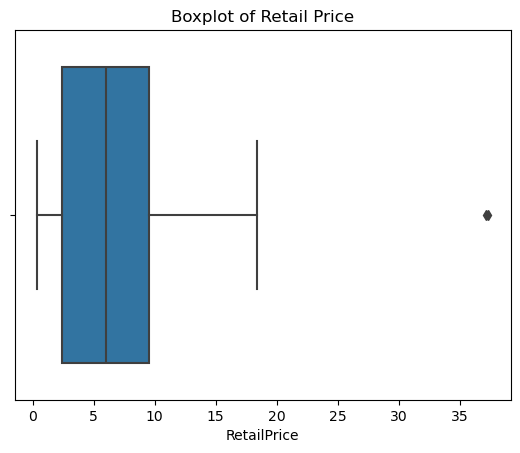

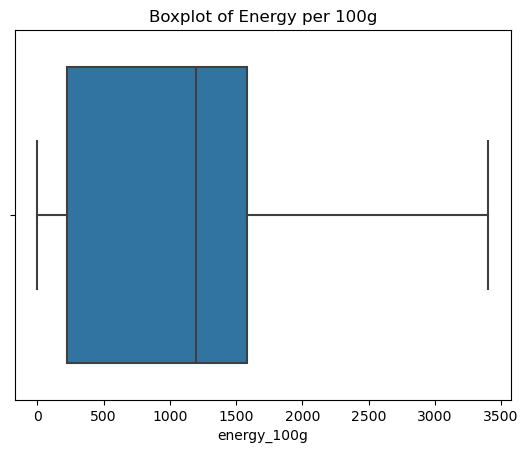

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to check for outliers in RetailPrice
sns.boxplot(x=data['RetailPrice'])
plt.title("Boxplot of Retail Price")
plt.show()

# Similarly, check for outliers in other variables like energy_100g
sns.boxplot(x=data['energy_100g'])
plt.title("Boxplot of Energy per 100g")
plt.show()

cluster
0     16.055245
15    12.911807
14    11.518137
2     10.363861
12     8.470798
16     8.238539
17     7.792339
11     7.751162
13     7.625410
3      7.274297
4      6.213157
6      5.973682
7      5.257045
8      4.905362
9      3.794450
5      2.835228
18     2.388730
19     2.387221
1      0.816600
Name: RetailPrice, dtype: float64


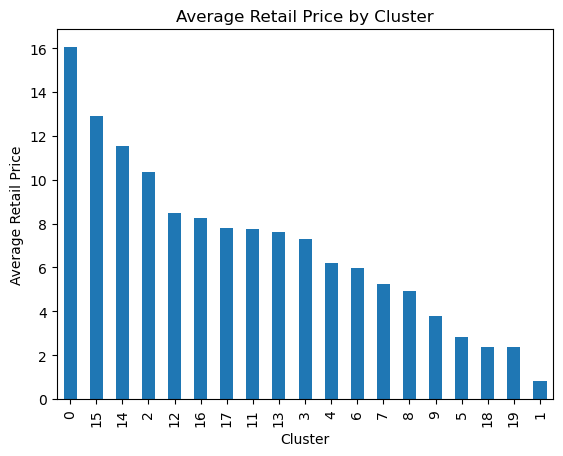

In [17]:

if 'cluster' in data.columns:
    avg_price_by_category = data.groupby('cluster')['RetailPrice'].mean().sort_values(ascending=False)
    print(avg_price_by_category)
    
    # Plot the average price by category
    avg_price_by_category.plot(kind='bar')
    plt.title("Average Retail Price by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Average Retail Price")
    plt.show()
else:
    print("Cluster column not found in the dataset.")

category
nuts and seeds                16.055245
chocolate                     12.911807
cheese                        11.518137
ice cream                     10.363861
strange cluster 12             8.470798
grains & flours                8.238539
mayonnaise & oils              7.792339
chips & popcorn                7.751162
pizza, tortillas               7.625410
cookies                        7.274297
creams & dips                  6.213157
strange cluster 6              5.973682
gummy bears & fruit snacks     5.257045
yoghurt and milk               4.905362
pasta & noodles                3.794450
water and diet drinks          2.835228
tomato sauce                   2.388730
sweet drinks                   2.387221
beans & peas                   0.816600
Name: RetailPrice, dtype: float64


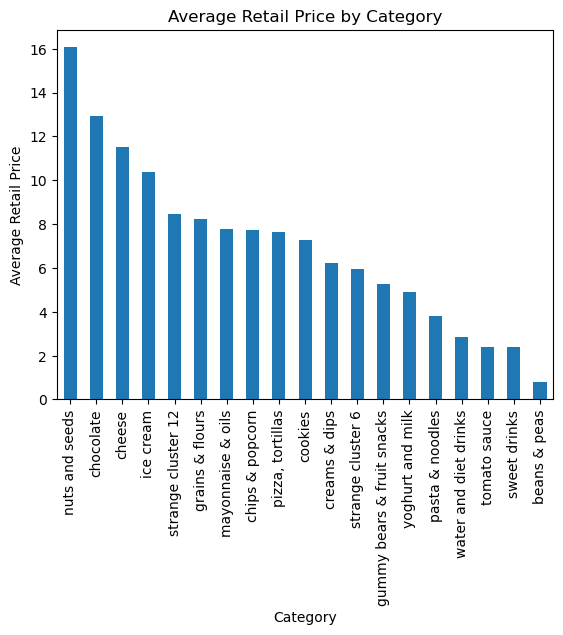

In [18]:

if 'category' in data.columns:
    avg_price_by_category = data.groupby('category')['RetailPrice'].mean().sort_values(ascending=False)
    print(avg_price_by_category)
    
    # Plot the average price by category
    avg_price_by_category.plot(kind='bar')
    plt.title("Average Retail Price by Category")
    plt.xlabel("Category")
    plt.ylabel("Average Retail Price")
    plt.show()
else:
    print("Category column not found in the dataset.")

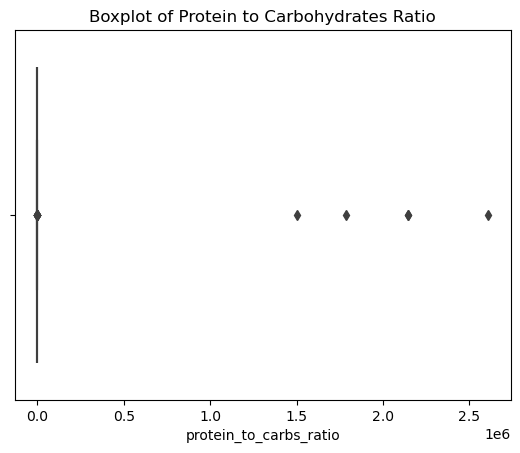

                        RetailPrice  protein_to_carbs_ratio
RetailPrice                1.000000                0.169868
protein_to_carbs_ratio     0.169868                1.000000


In [20]:
# Creating new feature: ratio of proteins to carbohydrates
data['protein_to_carbs_ratio'] = data['proteins_100g'] / (data['carbohydrates_100g'] + 1e-5)  # Adding a small value to avoid division by zero

# Boxplot to check the distribution of the new feature
sns.boxplot(x=data['protein_to_carbs_ratio'])
plt.title("Boxplot of Protein to Carbohydrates Ratio")
plt.show()

# Check the correlation of the new feature with RetailPrice
print(data[['RetailPrice', 'protein_to_carbs_ratio']].corr())

Your correlation matrix shows the following results:

	•	The correlation between RetailPrice and protein_to_carbs_ratio is 0.17 (approximately). This indicates a weak positive correlation between the price and the protein-to-carbohydrates ratio.

What does this mean?

	•	Since the correlation is weak, the protein-to-carbs ratio does not have a strong linear relationship with the price in your dataset.
	•	A positive value means that as the protein-to-carbs ratio increases, there is a slight tendency for the price to increase, but it’s not a significant or strong factor in driving price changes.

Next Steps:

	1.	Interpretation: Since the correlation is weak, you might want to explore other features that could explain the price better. For example, energy content or protein content alone may have a stronger impact.
	2.	Add More Features to the Model: Instead of relying on just the protein-to-carbs ratio, you could create additional features that might have a stronger relationship with price, such as:
	•	Fat content
	•	Fiber content
	•	Micronutrients (vitamins, minerals, etc.)
	3.	Consider Non-linear Models: If you suspect that the relationship between price and nutritional content is not strictly linear, you might want to explore non-linear models (e.g., decision trees, random forests) that can capture more complex relationships.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Select relevant features and the target variable
features = ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g']
target = 'RetailPrice'


df_clean = data.dropna(subset=[target])

# Selecting the features and the target
X = df_clean[features]
y = df_clean[target]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop the row with the missing target value in the train set (already done earlier)
X_train = X_train[y_train.notna()]
y_train = y_train[y_train.notna()]

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Checking model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 11.989966409182863
R-squared: 0.5035192851421719
                    Coefficient
energy_100g            0.010236
fat_100g              -0.285365
carbohydrates_100g    -0.149516
sugars_100g            0.012331
proteins_100g          0.033671


In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

NameError: name 'y_test' is not defined